# Kanonska korelaciona analiza
 


**Korelacija** je tehnika koje nam sluzi da analiziramo povezanost dve promenjive. Kada imamo vise promenjivih koristimo kanonsku korelacionu analizu.  
**Kanonskom korelaciona analiza** se bavi utvrdjivanje veze i jacine povezanosti izmedju dva skupa promenjivih. Uopsteno cilj kanonske korelacione analize je formiranje linearne kombinacije izmedju dva skupa, tako da izmedju njih postoji maksimalna korelacija. Teorijski doprinos dao je Hotelling 1936. godine. Primenjuje se u ekonomiji, psihologiji, medicini, meteorologiji i jos dosta nauka.

![CCA](Canonical_Correlation_Analysis_CCA.png)

Potrebna su dva vektora X i Y, koji mogu da imaju razliciti broj elemenata. \
X = [x1,...,xp] i Y = [y1,..,yq] (prepostavka p <= q). \
Zatim se definusu linearne kombinacije U i V. 

> $U1 = a11x1 + ... a1pxp$ \
.\
. \
. \
$Up = ap1x1 + ... appxp$ 

> $V1 = b11y1 + ... b1pyp$ \
. \
. \
. \
$Vp = bp1x1 + ... appyp$

Dobijaju se parovi (Ui, Vi) i=1,..,p, koji se nazivaju **kanonski varijantni parovi**. \
Zatim se racuna **varijanca od Ui**: 

> $var(Ui) = \sum \limits _{k=1} ^{p} \sum \limits _{l=1} ^{p} aikailcov(Xk,Xl)$ 

Zatim od **varijanca od Vi**: 
> $var(Vi) = \sum \limits _{k=1} ^{p} \sum \limits _{l=1} ^{p} bikbilcov(Yk,Yl)$ 

**Kovarijansa** izmedju Ui i Vi: 
> $cov(Ui,Vj) = \sum \limits _{k=1} ^{p} \sum \limits _{l=1} ^{p} aikbjlcov(Xk,Yl)$ 

**Korelacija** izmedju Ui i Vi se racuna: 
> $\frac{con(Ui,Vi)}{\sqrt (var(Ui)var(Vi))}$ 

**Kanonska korelacija** je specijalan tip korelacije pa se racuna: 
> $ pi* = \frac{con(Ui,Vi)}{\sqrt (var(Ui)var(Vi))}$


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_decomposition import CCA

from sklearn import preprocessing
from sklearn import model_selection

In [2]:
input_folder = 'input'
output_folder = 'output'
dataset_penguins = 'penguins.csv'

## Ucitavanje i obrada podataka

Ogranicenja i uslovi koriscenja kanonske korelacione analize:
  - koristi se tamo gde nema predpostavke o rasporedu slucajnih vektora
  - Potrebno je da broj ispitanika bude veci 40-60 puta od od broja varijabli
  - ogranicenja su jos i interpretabilnost, linearna veza, senzitivnost...

Primer na kom ce biti prikazan rad kanonske korelacione analize, je dataset zasnovan na podacima o pingvinima. \
Prvo ce biti ucitani i sredjeni podaci. Zatim ce biti odabrane kolone na kojima ce biti prikazan kako radi kanonska korelaciona analiza. Kolone dataseta koji ce biti koriscen su sledece: 
   - **Unnamed: 0** - indeks (ne koristi se u daljem radu)
   - **species** - vrsta 
   - **island** - ostrvo sa kog su 
   - **bill_length_mm** - duzina kljuna u mm 
   - **bill_depth_mm** - dubina kljuna u mm 
   - **flipper_length_mm**	 - duzina krila u mm 
   - **body_mass_g** - tezina u g 
   - **sex** - pol 

In [3]:
df = pd.read_csv(input_folder + '/' + dataset_penguins)

In [4]:
df.shape

(344, 8)

In [5]:
df.columns

Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 0'],axis=1)

In [7]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
df = df.dropna()
df.shape

(333, 7)

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64


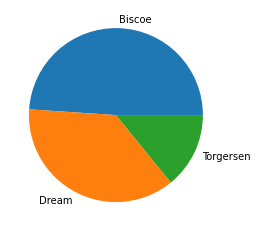

In [9]:
island = df['island'].value_counts()
print(island)
plt.pie(island, labels=island.index)
plt.show()

In [10]:
sex = df['sex'].value_counts()
print(sex)

MALE      168
FEMALE    165
Name: sex, dtype: int64


In [11]:
print('Duzine kljunova')
print(df['bill_length_mm'].unique())
print('Dubine kljunova')
print(df['bill_depth_mm'].unique())

Duzine kljunova
[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2 46.1
 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6 46.7
 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5 50.8
 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8 43.5
 49.6 48.7 43.3 48.4 45.1 46.3 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.
 45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4 43.4 52.1
 44.5 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
Dubine kljunova
[18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 21.1 19.  20.7 18.4 21.5
 18.3 19.2 18.1 17.2 18.9 18.6 17.9 16.7 17.  20.  18.5 19.1 19.7 16.9

In [12]:
print('Prosecna duzina kljuna: ' + str(df['bill_length_mm'].mean()) + 'mm')
print('Prosecna dubina kljuna: ' + str(df['bill_depth_mm'].mean()) + 'mm')
print('Prosecna duzina krila: ' + str(df['flipper_length_mm'].mean()) + 'mm')
print('Prosecna tezina: ' + str(df['body_mass_g'].mean()) + 'g')

Prosecna duzina kljuna: 43.99279279279279mm
Prosecna dubina kljuna: 17.164864864864864mm
Prosecna duzina krila: 200.96696696696696mm
Prosecna tezina: 4207.057057057057g


In [13]:
np.corrcoef(df['bill_length_mm'],df['flipper_length_mm'])

array([[1.        , 0.65309564],
       [0.65309564, 1.        ]])

In [14]:
np.corrcoef(df['bill_depth_mm'],df['body_mass_g'])

array([[ 1.        , -0.47201566],
       [-0.47201566,  1.        ]])

## Izbor vektora

Vektori moraju biti medjusobno nezavisni.

Za prvi skup ce biti uzeti podaci o kljunu. Oba podatka su u milimetrima. Zatim ce ti podaci standardizovani.

In [15]:
X = df[['bill_length_mm','bill_depth_mm']]

In [16]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

Za drugi skup ce biti uziti podaci o krilima koji su u milimetrima i tezini koji su u gramima i vrsimo standardizaciju podataka. 

In [17]:
Y = df[['flipper_length_mm','body_mass_g']]

In [18]:
scaler = preprocessing.StandardScaler()
scaler.fit(Y)
Y_standard = scaler.transform(Y)

Ova dva skupa su uzeta da bi utvrdili da li postoji veza izmedju informacija o kljuni i podataka o tezini i krilima kod pingvina.

## Primena funkcije ca podrazumevanim parametrima

Za primenu korelacione kanonske analize postoji ugradjena klasa python biblioteke sclearn koja se naziva **CCA**.

*class sklearn.cross_decomposition.CCA()*

Parametri funkcije su sledeci: 
   - **n_components** *int*, default=2 - broj komponenti koje cuvamo, podrazumevano je dva, a trebalo bi da bude izmedju jedan i minimuma vektora nad kojima vrsimo korelacionu analizu
   - **scale** *bool*, default=True - da li se poveca X i Y, podrazumevano je da povecavamo
   - **max_iter** *int*, default=500 - maksimalan broj iteracija, podrazumevano je 500
   - **tol** *float*, default=1e-06 - tolerancija greske, staje kad je xi+1 - xi < tol
   - **copy** *bool*, default=True - da li da funkcija kopira podatke ili ih kroz iteraciju menja  

Funkicija koristi iterativnu **metodu najmanjih kvadrata**.

In [19]:
cca = CCA();

In [20]:
cca.fit(X_standard, Y_standard);

Kao rezultat dobijamo dve kanonske korelacione matrice.

In [21]:
X_c, Y_c = cca.transform(X_standard, Y_standard) 

## Analiza i prikaz rezultata

In [22]:
cca.n_iter_

[3, 2]

Proveravamo da li smo dobili vektore koji imaju su iste duzine kao pocetni

In [23]:
print(X_c.shape)
print(Y_c.shape)

(333, 2)
(333, 2)


Ovaj dataframe sa dobijenim matricama i podacima koje smo imali u ucitanim podacima (species, island, sex) je napravljen da bi se lakse analizirali i prikazali podaci.

In [24]:
cc_res = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCY_1":Y_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "CCY_2":Y_c[:, 1],
                       "Species":df.species.tolist(),
                       "Island":df.island.tolist(),
                       "sex":df.sex.tolist()})

In [25]:
cc_res.to_csv(output_folder  + '/rezultati.csv')

### Korelacioni koeficijent za ova dva vektora i graficki prikaz

**Koeficijent kanonske korelacije** je stepen povezanosti dve promenjive, prestavlja maksimalnu povezanost ova dva skupa. Moze se izracunati uz pomoc *corrcoef* metode python bibliote nimpy.

*numpy.corrcoef(x, y=None, rowvar=True, dtype=None)*

In [26]:
def korelacioni_koef(X,Y):
    return np.corrcoef(X, Y)[0][1]

In [27]:
def grafik_korelacije(X,Y,x_name,y_name):
    plt.figure(figsize=(10,8))
    plt.scatter(X,Y)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.plot([-2, 2], [-2, 2], ls="--", c=".3")
    plt.title(x_name + ' and ' + y_name)
    plt.show()

In [28]:
korelacioni_koef(cc_res["CCX_1"],cc_res["CCY_1"])

0.7876315142908986

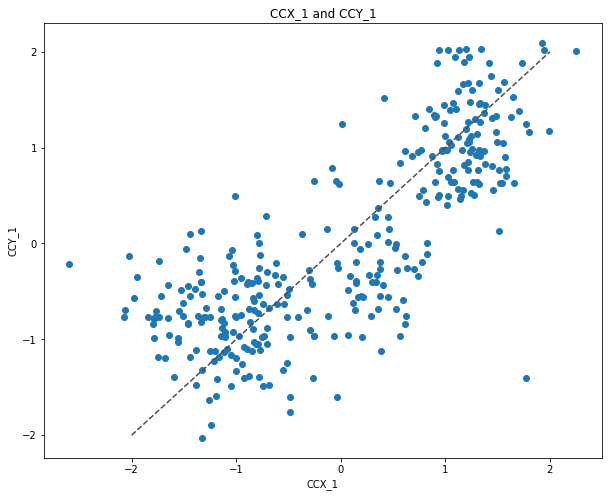

In [29]:
grafik_korelacije(cc_res['CCX_1'],cc_res['CCY_1'],'CCX_1','CCY_1')

In [30]:
korelacioni_koef(cc_res["CCX_2"],cc_res["CCY_2"])

0.08638694671010338

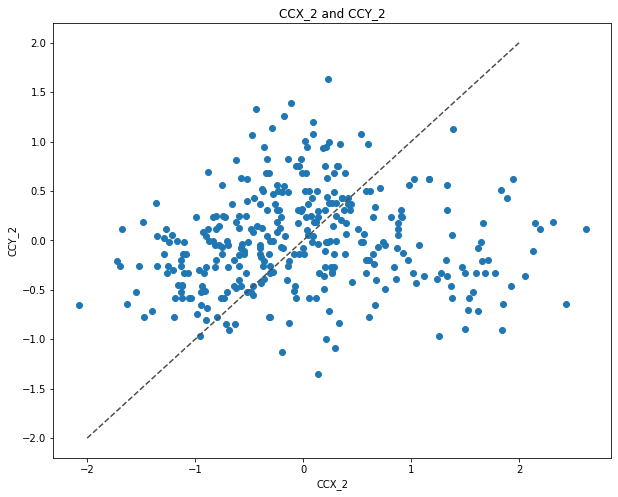

In [31]:
grafik_korelacije(cc_res['CCX_2'],cc_res['CCY_2'],'CCX_2','CCY_2')

Prvi par podataka ima mnogo jacu korelaciju, sto se moze videti i sa grafika i iz korelacionih koeficijenata. Sto nam je korelacioni koeficijent blizi 1 i sto nam se vise tackasti prikaz prostire vise oko diagonale to je bolje. 



### Analiza podataka kroz ostale kolone

In [32]:
def grafik_poredjenje(cc_res,column):
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    groups = cc_res.groupby(column)
    for name, group in groups:
        plt.plot(group["CCX_1"], group["CCY_1"], marker="o", linestyle="", label=name)
    plt.legend()
    plt.title('bill length vs flipper length')
    plt.subplot(1, 2, 2) # index 2
    groups = cc_res.groupby(column)
    for name, group in groups:
        plt.plot(group["CCX_2"], group["CCY_2"], marker="o", linestyle="", label=name)
    plt.title('bill depth vs body mass')
    plt.legend()
    plt.suptitle(column)
    plt.show()

Iz prikaza dobijenih podataka mozemo zakljuciti da su u odnosu na vrstu pingvina postoji veca povezanost izmedju duzine kljuna i sirine krila, nego sirina kljuna i tezina.

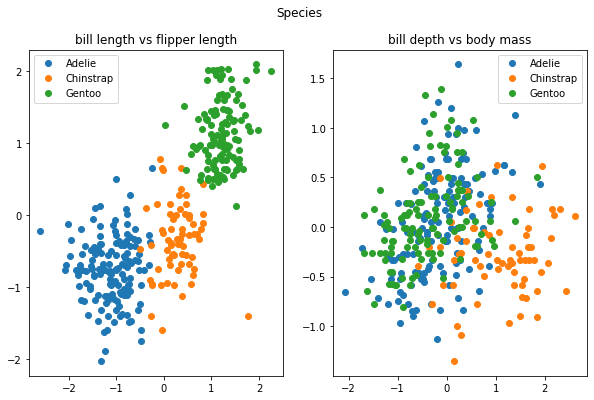

In [33]:
grafik_poredjenje(cc_res,'Species')

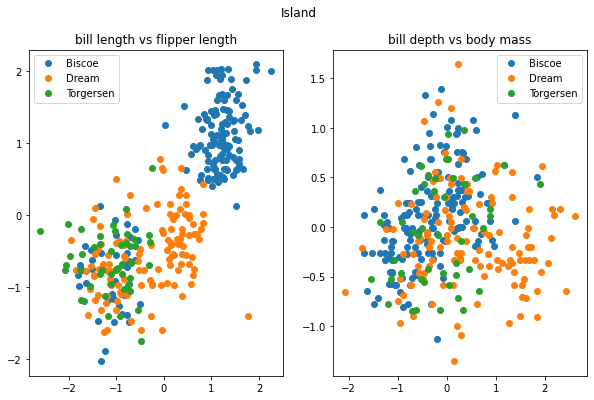

In [34]:
grafik_poredjenje(cc_res,'Island')

Iz prikaza dobijenih podataka mozemo zakljuciti da su u odnosu na ostrvo na kom pingvini zive postoji veca povezanost izmedju duzine kljuna i sirine krila, nego sirina kljuna i tezina. Ali da je slabija od odnosa sa vrstom.

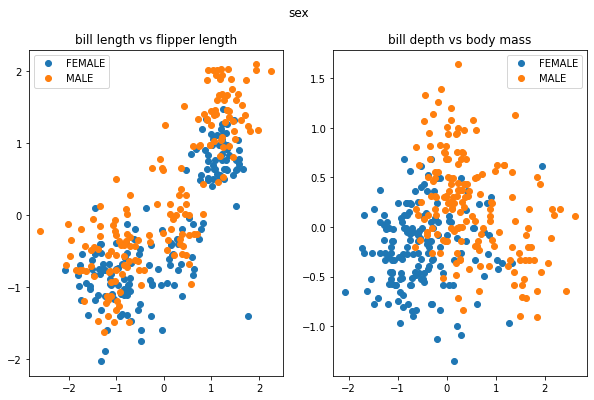

In [35]:
grafik_poredjenje(cc_res,'sex')

Iz prikaza dobijenih podataka mozemo zakljuciti da su u odnosu na pol na kom pingvini zive postoji veca povezanost izmedju duzine kljuna i sirine krila, nego sirina kljuna i tezina. Ali da je slabija od odnosa sa vrstom.

## Primena funkcije sa proizvoljnim parametrima

### Primena sa manjim brojem iteracija

In [36]:
def max_iter_grafik(X,Y,cc_res,n):
    plt.figure(figsize=(10,8))
    plt.scatter(X,Y)
    plt.scatter(cc_res['CCX_' + n],cc_res['CCY_'+ n])
    plt.xlabel('CCX_'+ n)
    plt.ylabel('CCY_'+ n)
    plt.plot([-2, 2], [-2, 2], ls="--", c=".3")
    plt.title('CCX_' + n + ' and CCY_' + n)
    plt.show()

In [37]:
cca_mi = CCA(max_iter=1,tol=1e-100000);


In [38]:
cca_mi.fit(X_standard, Y_standard);

/home/nemanja/.local/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:97: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached',


In [39]:
X_cmi, Y_cmi = cca_mi.transform(X_standard, Y_standard) 

In [40]:
korelacioni_koef(X_cmi[:, 0], Y_cmi[:, 0])

0.787630665702118

In [41]:
korelacioni_koef(X_cmi[:, 1], Y_cmi[:, 1])

0.08638703978290642

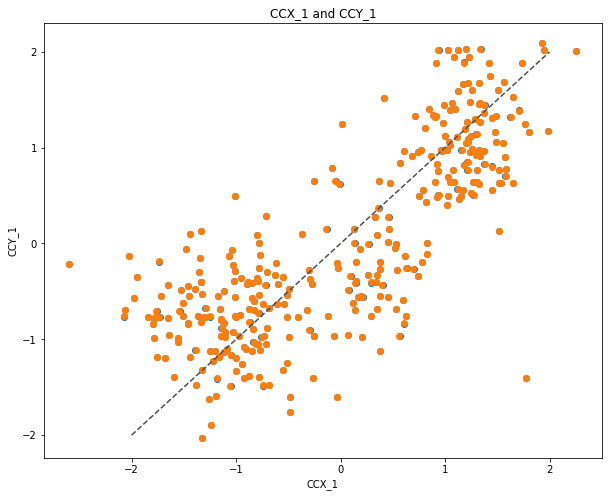

In [42]:
max_iter_grafik(X_cmi[:, 0], Y_cmi[:, 0],cc_res,'1')

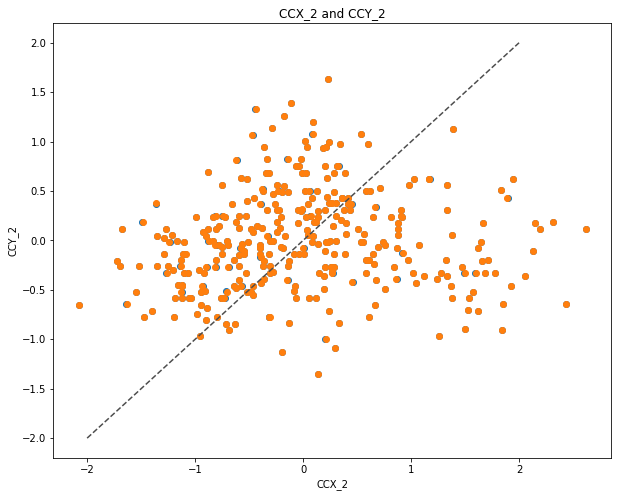

In [43]:
max_iter_grafik(X_cmi[:, 1], Y_cmi[:, 1],cc_res,'2')

In [44]:
cca_mi.n_iter_

[1, 1]